## Movie Recommendation System Based On Content & Popularity.
Step into the realm of cinematic wonders, where you'll embark on an enthralling journey through the world of movie recommendation systems. Just as film enthusiasts rely on platforms like MovieLens to discover their favorite films and explore new genres, you'll become a cinematic virtuoso, ready to unlock the hidden treasures within this vast sea of movie data.

Your adventure begins with a mission as crucial as setting the stage for a blockbuster movie—cleaning the dataset. Picture yourself as the director, meticulously ensuring that every scene is perfectly framed, preparing the data for a cinematic masterpiece. It's all about creating the ideal canvas for a data-driven cinematic saga.

Once the dataset shines brightly, you'll plunge into the heart of this cinematic universe—data analysis. Here, you become the film critic, deciphering what makes a movie resonate with viewers, spotting trends in cinematic tastes, and unveiling the secrets behind audience preferences. This journey is all about transforming raw data into captivating cinematic insights.

As the project unfolds, you'll emerge as the unsung hero behind the scenes. Just like a bustling film crew working tirelessly to create unforgettable scenes, your work will enhance the movie discovery experience for film enthusiasts. Your insights will help movie buffs discover the perfect films for every mood, and filmmakers will gain valuable insights to craft better cinematic experiences.

In this world of data-driven cinema, you are the director, the data wizard, and the storyteller. Your dedication to cleaning, analyzing, and implementing recommendation algorithms adds to the magic of movie discovery, making every viewing experience extraordinary. Your journey is one of data, cinema, and endless possibilities.

This project is your opportunity to delve into the fascinating realm of recommendation algorithms, including content-based, popularity-based, and collaborative filtering methods. Armed with two MovieLens datasets, you'll unravel the secrets of cinematic preference and provide movie enthusiasts with tailored recommendations that will leave them spellbound. Get ready to embark on this interactive cinematic data adventure, where you'll craft cinematic insights and unlock the true potential of these captivating datasets.

## Module 1
### Task 1: Data-Driven Cinema.
In a quiet library, a curious data analyst harnessed the power of pandas to import 'movies.csv.' Rows of movie titles and genres unfolded on the screen, each holding the promise of a unique cinematic experience. With a click, the analyst embarked on a movie-fueled journey, prepared to uncover hidden cinematic gems. The world of data was their guide to a night of movie magic, ready to explore stories yet untold.

In [89]:
import warnings
warnings.filterwarnings("ignore")

In [90]:
#--- Import Pandas ---
import pandas as pd
#--- Read in dataset ----
movies = pd.read_csv("movies.csv")

# ---WRITE YOUR CODE FOR TASK 1 ---
#--- Inspect data ---
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

### Task 2: Unraveling Film Credits.
As the 'credits.csv' data loaded with the power of pandas, an exciting journey into the heart of filmmaking began. Rows of names and roles filled the screen, each representing a piece of the cinematic puzzle. The data enthusiast aimed to unravel the connections between actors, directors, and crew members, discovering the hidden stories behind their favorite films. With each line of code, the magic of filmmaking unfolded, revealing the intricate web of collaboration that brought movies to life. This data promised to add a new dimension to their appreciation of cinema.

In [91]:
#--- Read in dataset ----
credits = pd.read_csv("credits.csv")

# ---WRITE YOUR CODE FOR TASK 2 ---
#--- Inspect data ---
credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


### Task 3: Cinematic Fusion.
With 'movies' and 'credits' datasets seamlessly merged on the 'title' column, our data enthusiast entered a new phase of cinematic exploration. The resulting 'df' dataset was a harmonious blend of film details and the unsung heroes who brought them to life.

As the data filled the screen, it became a window into the collaborative artistry behind each film. Rows of information depicted the intricate interplay between actors, directors, and the entire cast and crew, unveiling the magic that turns scripts into unforgettable movies.

In [92]:
#--- WRITE YOUR CODE FOR TASK 3 ---
df = pd.merge(left=movies,right=credits,how="inner",on="title")

#--- Inspect data ---
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"":

### Task 4: Enhancing Your Cinematic Experience.
We embark on this task with a clear purpose – to enhance your cinematic journey. Our mission is to provide you with a more enriching and personalized movie-watching experience. By refining and enriching our dataset, we're striving to connect you with the films that resonate most with your preferences.

Through these enhancements, we aim to reveal the underlying magic of cinema – the genres that touch your soul, the actors who bring stories to life, and the dedicated crew behind each masterpiece. Our goal is to empower you to discover, appreciate, and enjoy movies on a whole new level.

In [93]:
from typing import List
import ast



def convert_json_to_array(json_string: str):
    names = []

    array = ast.literal_eval(json_string)
    for item in array:
        names.append(item['name'] or None)

    return names


def convert_array_to_string(array: List):
    return ' '.join(array).lower()


def update_cast(key: str, value:  int):
    def inner_function(json_string: str):
        result = []
        for item in ast.literal_eval(json_string):
            if item[key] <= value:
                result.append(item['name'].strip().lower())
        return result
    return inner_function


def update_crew(key: str, values: List[str]):
    def inner_function(json_string: str):
        result = []
        for item in ast.literal_eval(json_string):
            if item[key] in values:
                result.append(item['name'].strip().lower())
        return result
    return inner_function


def combine_all_features(features: List[str]):
    def inner_function(series: pd.core.series.Series):
        result = ''
        for feature in features:
            result += (' '.join(series[feature]) + ' ')
        return result
    return inner_function



#--- WRITE YOUR CODE FOR TASK 4 ---
df["genres"] = df["genres"].apply(convert_json_to_array)
df["keywords"] = df["keywords"].apply(convert_json_to_array)
df["cast"] = df["cast"].apply(update_cast("order",5))
df["crew"] = df["crew"].apply(update_crew("job",["Screenplay","Producer","Editor","Writer","Director"]))


#--- Inspect data ---
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[sam worthington, zoe saldana, sigourney weave...","[stephen e. rivkin, james cameron, james camer..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[johnny depp, orlando bloom, keira knightley, ...","[gore verbinski, jerry bruckheimer, ted elliot..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[daniel craig, christoph waltz, léa seydoux, r...","[sam mendes, john logan, lee smith, barbara br..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[christian bale, michael caine, gary oldman, a...","[charles roven, christopher nolan, christopher..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[taylor kitsch, lynn collins, samantha morton,...","[andrew stanton, andrew stanton, colin wilson,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[Action, Crime, Thriller]",NaN,9367,"[united states–mexico barrier, legs, arms, pap...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[carlos gallardo, jaime de hoyos, peter marqua...","[robert rodriguez, robert rodriguez, robert ro..."
4805,9000,"[Comedy, Romance]",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[edward burns, kerry bishé, marsha dietlein, c...","[edward burns, edward burns, edward burns, wil..."
4806,0,"[Comedy, Drama, Romance, TV Movie]",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[date, love at first sight, narration, investi...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"

### Task 5: Refining Data for Deeper Insights.
With precision, the data enthusiast streamlined the dataset, removing extraneous columns that didn't add to the cinematic narrative. Elements like 'homepage,' 'original_language,' 'overview,' and many more were bid adieu, creating a cleaner, more focused dataset.

But the culling didn't stop there. Rows containing any missing data were also removed, ensuring the dataset remained robust and reliable. Now, every entry in 'df' was packed with valuable information ready to uncover new cinematic insights.

In [94]:
#--- WRITE YOUR CODE FOR TASK 5 ---
df.drop(["homepage","original_language","overview","id","spoken_languages","status", "tagline","movie_id","production_companies","production_countries"],axis=1,inplace=True)
df.dropna(inplace=True)
#--- Inspect data ---
df

,budget,genres,keywords,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[sam worthington, zoe saldana, sigourney weave...","[stephen e. rivkin, james cameron, james camer..."
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[johnny depp, orlando bloom, keira knightley, ...","[gore verbinski, jerry bruckheimer, ted elliot..."
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[daniel craig, christoph waltz, léa seydoux, r...","[sam mendes, john logan, lee smith, barbara br..."
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[christian bale, michael caine, gary oldman, a...","[charles roven, christopher nolan, christopher..."
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[taylor kitsch, lynn collins, samantha morton,...","[andrew stanton, andrew stanton, colin wilson,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",El Mariachi,14.269792,1992-09-04,2040920,81.0,El Mariachi,6.6,238,"[carlos gallardo, jaime de hoyos, peter marqua...","[robert rodriguez, robert rodriguez, robert ro..."
4805,9000,"[Comedy, Romance]",[],Newlyweds,0.642552,2011-12-26,0,85.0,Newlyweds,5.9,5,"[edward burns, kerry bishé, marsha dietlein, c...","[edward burns, edward burns, edward burns, wil..."
4806,0,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","Signed, Sealed, Delivered",1.444476,2013-10-13,0,120.0,"Signed, Sealed, Delivered",7.0,6,"[eric mabius, kristin booth, crystal lowe, geo...","[harvey kahn, martha williamson, scott smith, ..."
4807,0,[],[],Shanghai Calling,0.857008,2012-05-03,0,98.0,Shanghai Calling,5.7,7,"[daniel henney, eliza coupe, bill paxton, alan...","[daniel hsia, daniel hsia]"


## Module 2
### Task 1: Unveiling Decades of Movie Releases.
In a quest to unravel the cinematic past, our data explorer introduced a novel method, 'count_pie,' into their toolkit. This method ingeniously visualized movie release trends, offering a captivating pie chart as their storytelling canvas.

As the code executed, the pie chart emerged, shedding light on the ebb and flow of movies across decades. Thoughtful labels guided the eye to significant cinematic eras while allowing lesser-known trends to gracefully recede.

Each slice of the pie revealed a unique chapter in the history of film, from the Golden Age to the Modern Era. This artistic representation was more than just data; it was a visual gateway to explore the evolving storytelling tapestry of cinema.

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
def count_pie(series):
    counts = series.value_counts()
    counts = counts/counts.sum()
    labels = ['' if num < 0.01 else str(year)
              for (year, num) in counts.items()]
    f, ax = plt.subplots(figsize=(8, 8))
    explode = [0.02 if counts.iloc[i] <
                       100 else 0.001 for i in range(counts.size)]
    plt.pie(counts, labels=labels, autopct=lambda x: '{:1.0f}%'.format(
        x) if x > 1 else '', explode=explode)
    # plt.show()
    return counts


2000s    0.427
2010s    0.301
1990s    0.162
1980s    0.058
1970s    0.023
1960s    0.015
1950s    0.006
1940s    0.005
1930s    0.003
1920s    0.001
1910s    0.000
Name: count, dtype: float64

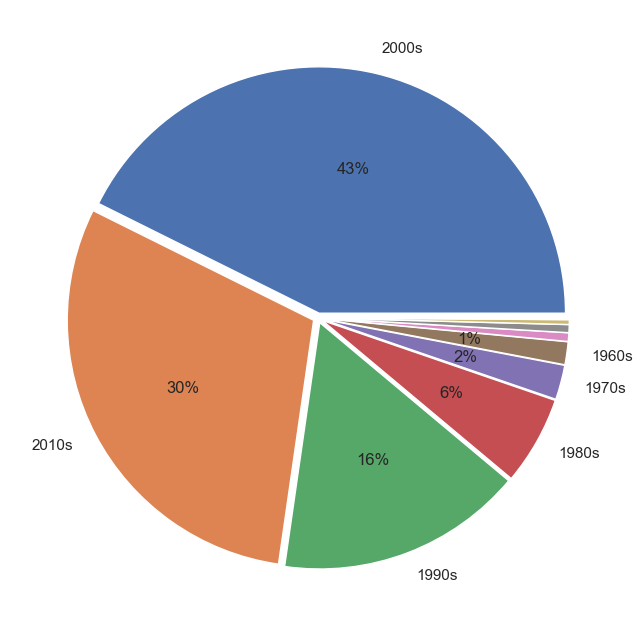

In [96]:
#--- WRITE YOUR CODE FOR TASK 1 ---
res = count_pie(pd.Series(list(map(lambda x: str(int(x[:4])//10*10)+'s',df["release_date"].dropna()))))
#--- Inspect data ---
result = res.round(3)
result

### Task 2: A Genre Exploration
In a quest for deeper cinematic insights, our data explorer embarked on a journey into the world of film genres. The code meticulously processed and analyzed the genre data, revealing the most prominent genres in the dataset.

As they charted the data, it became evident that some genres held a more significant presence than others, painting a vivid picture of audience preferences. The top genres emerged, and the data explorer gained a clearer understanding of the cinematic landscape.

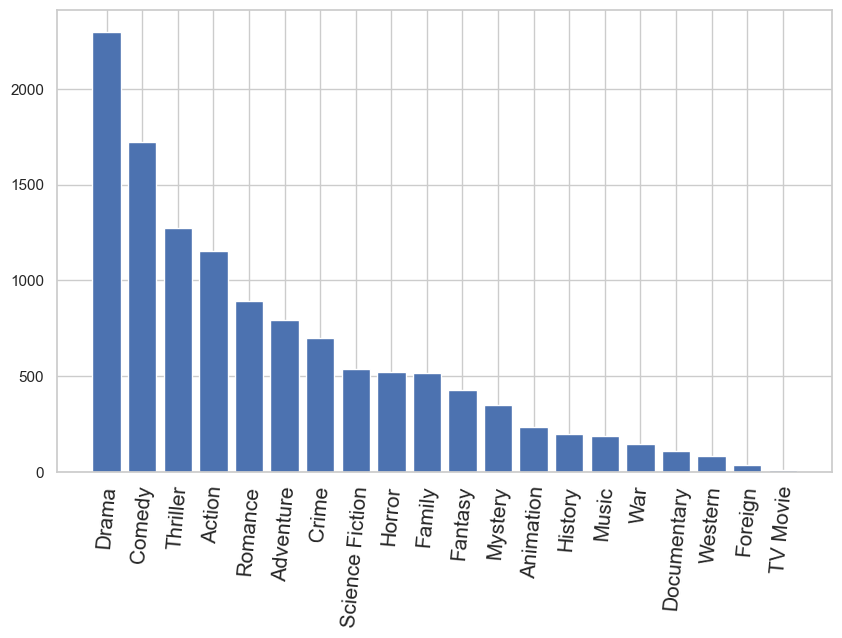

In [97]:
# ---WRITE YOUR CODE FOR TASK 2 ---

series = df.genres
sns.set(style="whitegrid")

total_genres = []
genres = []
values1 = []
genres.extend(series)
all_genres = []

for i in genres:
    all_genres  += i

total_genres = list(set(all_genres))

for i in total_genres:
    values1.append(all_genres.count(i))


dictionary = dict(zip(total_genres,values1))

dictionary = dict(sorted(dictionary.items(),key=lambda x: x[1],reverse=True))
plt.subplots(figsize=(10, 6))
plt.xticks(rotation=85, fontsize=15)
plt.bar(dictionary.keys(), dictionary.values(), align="center")
plt.show()
#--- Inspect data ---

### Task 3: Exploring Keywords in Film.
Continuing their journey through the world of cinema data, our intrepid data explorer shifted their focus to the intricate world of film keywords. The code worked diligently to unveil the most frequently used keywords in the dataset, offering a glimpse into the language of storytelling.

As the chart came to life, the most prominent keywords emerged, providing a fresh perspective on the themes and motifs that resonated with filmmakers and audiences alike. These keywords were the thread connecting different stories, genres, and emotions.

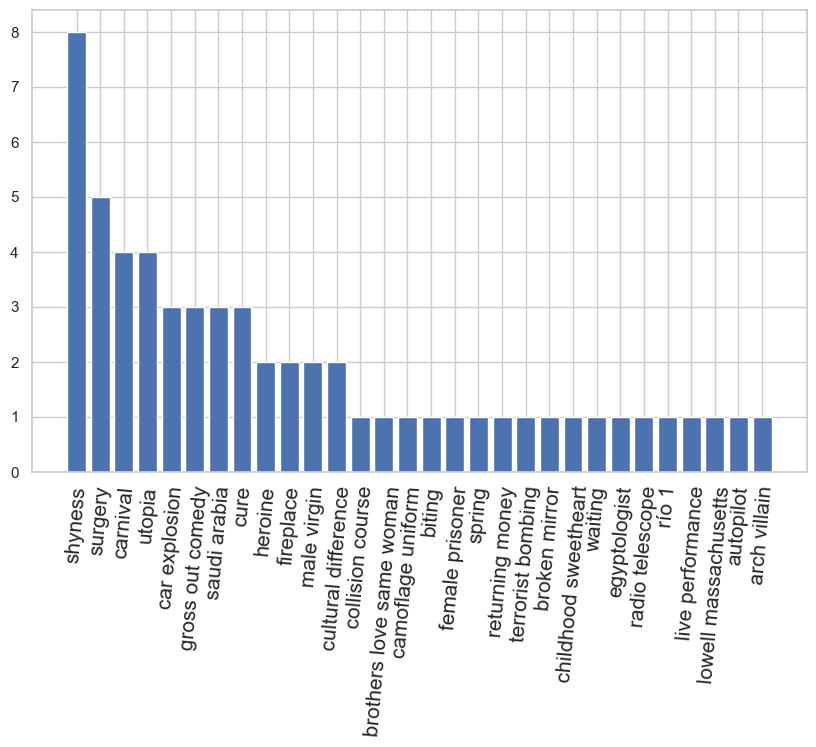

In [98]:
# ---WRITE YOUR CODE FOR TASK 3 ---

series = df.keywords
sns.set(style="whitegrid")

total_keywords = []
keywords = []
values2 = []
keywords.extend(series)
all_keywords = []

for i in keywords:
    all_keywords  += i

total_keywords = list(set(all_keywords))

for i in total_keywords:
    values2.append(all_keywords.count(i))


dictionary = {}
ctr = 0
for i in range(0,30):
    dictionary[total_keywords[i]] = values2[i]
dictionary = dict(sorted(dictionary.items(),key=lambda x: x[1],reverse=True))
plt.subplots(figsize=(10, 6))
plt.xticks(rotation=85, fontsize=15)
plt.bar(dictionary.keys(), dictionary.values(), align="center")
plt.show()



### Task 4: Genre Word Clouds
As the cinematic journey continued, the data explorer set their sights on visualizing the essence of film genres. Through the magic of word clouds, they transformed data into art, with each word cloud reflecting the frequency of genre mentions in the dataset.

In a burst of creativity, the word cloud emerged, its shape and size reflecting the prominence of different genres in the cinematic landscape. This visual representation of film genres painted a vivid picture of audience preferences, encapsulating the spirit of each genre.

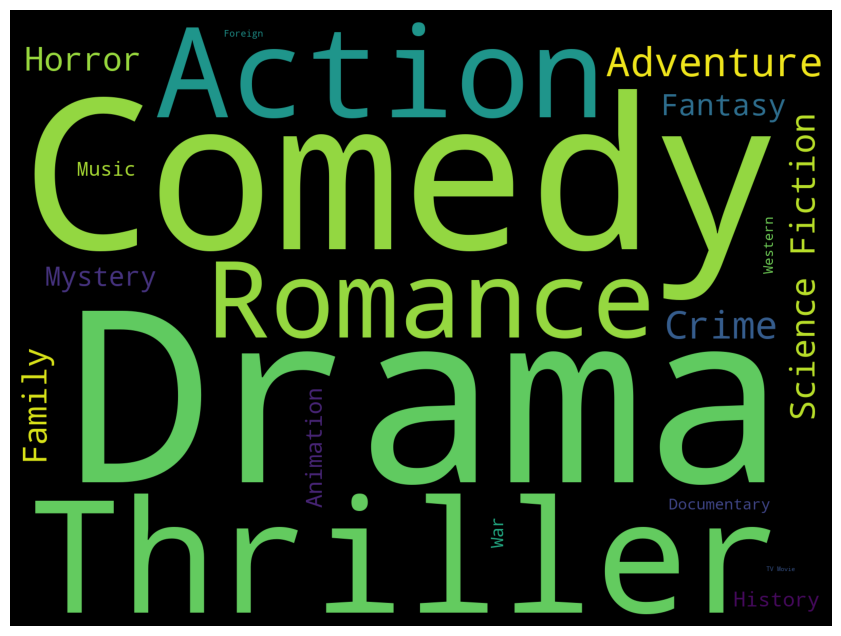

In [99]:
# ---WRITE YOUR CODE FOR TASK 4 ---

series = df.genres
word_cloud = wc.WordCloud(background_color="black", margin=20, width=800,
                          height=600, prefer_horizontal=0.7, max_words=50, scale=2)
total_genres = []
all_genres = []

for i in series:
    all_genres += i

total_genres = list(set(all_genres))

values3 = []
for i in total_genres:
    values3.append(all_genres.count(i))

dictionary = dict(zip(total_genres,values3))
dictionary = dict(sorted(dictionary.items(),key=lambda x: x[1],reverse=True))

word_cloud.generate_from_frequencies(dictionary)
word_cloud.to_file('fig4.png')
plt.subplots(figsize=(16, 8))
plt.axis('off')
plt.imshow(word_cloud)
plt.show()

#--- Inspect data ---

### Task 5: Exploring Numerical Correlations.

In the pursuit of understanding the quantitative aspects of cinema, our data explorer dived into the world of numerical data. The code meticulously selected columns like 'budget,' 'popularity,' 'revenue,' 'runtime,' 'vote_average,' and 'vote_count,' aiming to decipher the connections between these factors and their impact on the cinematic landscape.

A striking correlation matrix came to life, with each cell revealing the relationships between the quantitative elements that shape the film industry. The heatmap was a visual symphony of colors and numbers, offering insights into how budget, popularity, runtime, and more intertwined in the world of movies.

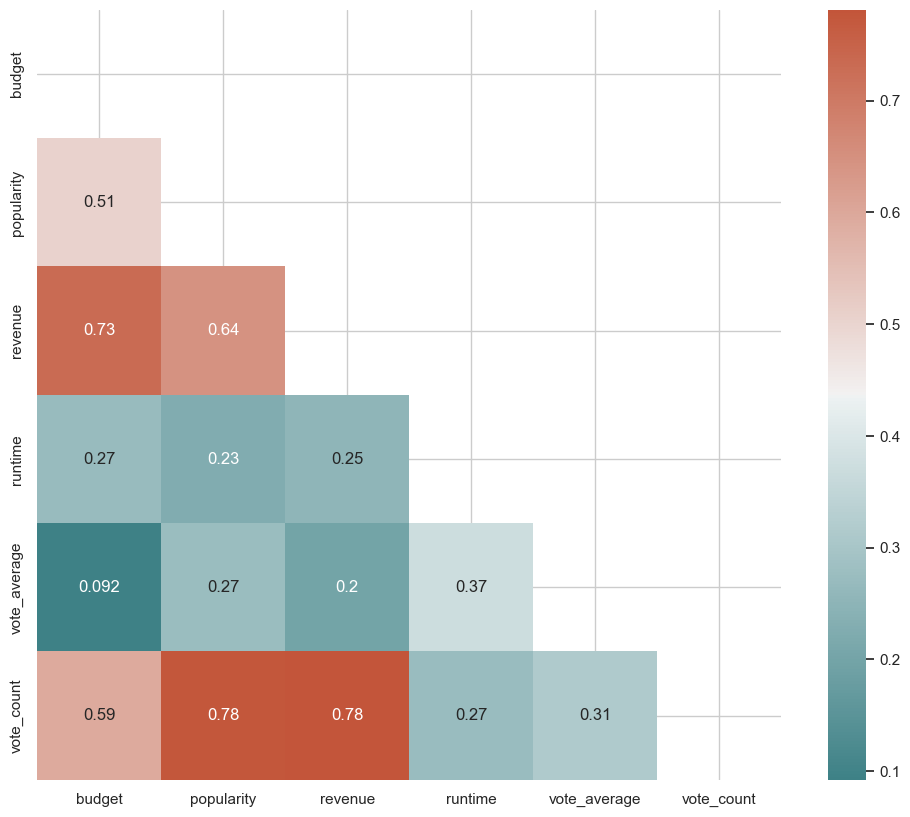

In [100]:
# ---WRITE YOUR CODE FOR TASK 5 ---

# Calculate the correlation matrix
cor = df[["budget","popularity","revenue","runtime","vote_average","vote_count"]].corr()
plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(cor, dtype=bool))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(cor, annot=True, mask=mask, cmap=cmap)
plt.show()

#--- Inspect data ---

## Module 3
### Task 1: Crafting the 'Feature' Column.
In a quest to unveil the intricate tapestry of cinematic storytelling, our data explorer took a fascinating turn. They ingeniously created a new feature, aptly named 'feature,' by seamlessly merging data from 'genres,' 'keywords,' 'cast,' and 'crew' columns. This novel approach was a testament to their dedication in extracting the essence of a movie.

The resulting 'feature' column became a melting pot of elements that define a film. It was a blend of genres, keywords, the ensemble cast, and the dedicated crew, encapsulating the soul of each movie in a single, comprehensive representation.

In [101]:
# ---WRITE YOUR CODE FOR TASK 2 ---
df["feature"] = list(map(lambda x,y,z,w: combine_all_features(features=[x,y,z,w]),df["genres"],df["keywords"],df["cast"],df["crew"]))
#--- Inspect data ---
df

,budget,genres,keywords,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew,feature
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[sam worthington, zoe saldana, sigourney weave...","[stephen e. rivkin, james cameron, james camer...",<function combine_all_features.<locals>.inner_...
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[johnny depp, orlando bloom, keira knightley, ...","[gore verbinski, jerry bruckheimer, ted elliot...",<function combine_all_features.<locals>.inner_...
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[daniel craig, christoph waltz, léa seydoux, r...","[sam mendes, john logan, lee smith, barbara br...",<function combine_all_features.<locals>.inner_...
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[christian bale, michael caine, gary oldman, a...","[charles roven, christopher nolan, christopher...",<function combine_all_features.<locals>.inner_...
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[taylor kitsch, lynn collins, samantha morton,...","[andrew stanton, andrew stanton, colin wilson,...",<function combine_all_features.<locals>.inner_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",El Mariachi,14.269792,1992-09-04,2040920,81.0,El Mariachi,6.6,238,"[carlos gallardo, jaime de hoyos, peter marqua...","[robert rodriguez, robert rodriguez, robert ro...",<function combine_all_features.<locals>.inner_...
4805,9000,"[Comedy, Romance]",[],Newlyweds,0.642552,2011-12-26,0,85.0,Newlyweds,5.9,5,"[edward burns, kerry bishé, marsha dietlein, c...","[edward burns, edward burns, edward burns, wil...",<function combine_all_features.<locals>.inner_...
4806,0,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","Signed, Sealed, Delivered",1.444476,2013-10-13,0,120.0,"Signed, Sealed, Delivered",7.0,6,"[eric mabius, kristin booth, crystal lowe, geo...","[harvey kahn, martha williamson, scott smith, ...",<function combine_all_features.<locals>.inner_...
4807,0,[],[],Shanghai Calling,0.857008,2012-05-03,0,98.0,Shanghai Calling,5.7,7,"[daniel henney, eliza coupe, bill paxton, alan...","[daniel hsia, daniel hsia]",<function combine_all_features.<locals>.inner_...


### Task 2: Creating the 'Indices' Bridge.
In the quest for a more intuitive way to navigate the cinematic treasure trove, our data explorer introduced a vital element to their dataset. With the creation of the 'indices' series, they cleverly linked movie titles with their corresponding indices.

This ingenious move offered a streamlined pathway for movie enthusiasts to find their favorite films swiftly. Titles now served as keys to unlock the vast world of cinematic data, making it easier than ever to access a specific movie's information.

In [102]:
# ---WRITE YOUR CODE FOR TASK 2 ---
indices = pd.Series(data=df.index.values,index=df["title"])
indices.drop_duplicates(inplace=True)
indices
#--- Inspect data ---

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4804
Newlyweds                                   4805
Signed, Sealed, Delivered                   4806
Shanghai Calling                            4807
My Date with Drew                           4808
Length: 4806, dtype: int64

### Task 3: Exploring Movie Recommendations with NLP.
As our data explorer ventured deeper into the world of movie recommendations, they harnessed the power of natural language processing. With the help of the TfidfVectorizer and cosine similarity calculations, they transformed movie descriptions and features into a matrix ripe for comparison.

By inputting a chosen movie title, the code skillfully identified similar films based on their descriptions and features. The resulting list of similar movies offered movie enthusiasts a personalized guide to discover new cinematic gems.

In this data-driven journey, the code served as a bridge between film preferences and recommendations. As the list of similar movies emerged, our data explorer had unlocked the potential to make every movie night a unique and exciting adventure, connecting moviegoers with films they might otherwise have missed.

In [103]:
# Write the movie name from the dataset inside the 'title' variable within apostrophes.
# title = ''

Movie Recommendation Based on Cosine Similarity with TF-IDF.

Import necessary modules from the scikit-learn library for text vectorization and similarity calculation, including 'CountVectorizer,' 'TfidfVectorizer,' and 'cosine_similarity.'

Initialize a 'TfidfVectorizer' named 'tfidf' and specify 'stop_words' as 'english' to remove common English words from the text data.

Create a 'tfidf_matrix' by applying the 'fit_transform' method to the 'feature' column of the DataFrame 'df' using the 'tfidf' vectorizer. This matrix represents the TF-IDF (Term Frequency-Inverse Document Frequency) values for each movie's features.

Calculate the cosine similarity between the movies based on the 'tfidf_matrix' and store the result in 'cosine_sim_tfidf.'

Determine the index of the movie with the given 'title' by looking it up in the 'indices' Series.
Generate a list of similarity scores for the movie with the given 'title' by enumerating through 'cosine_sim_tfidf' at the index corresponding to the movie.

Sort the similarity scores in descending order to identify the most similar movies. Exclude the first entry, which is the movie itself, and select the next 10 most similar movies.

Extract the indices of the 10 most similar movies to obtain movie recommendations and store them in the 'movie_indices' list.

Retrieve the titles of the recommended movies using 'iloc' and store them in the 'recommend1' variable.

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
# ---WRITE YOUR CODE FOR TASK 3 ---
tfidf_matrix = tfidf.fit_transform(df["feature"])
cosine_sim_tfidf = cosine_similarity(tfidf_matrix,tfidf_matrix)
for i in cosine_sim_tfidf:
    print(i)


#--- Inspect data ---

AttributeError: 'function' object has no attribute 'lower'

In [71]:
df["feature"].inner_function

AttributeError: 'Series' object has no attribute 'inner_function'

### Task 4: Exploring Movie Recommendations with CountVectorizer.
As our data explorer delved even deeper into the realm of cinematic recommendations, they expanded their toolkit to include CountVectorizer and a fresh cosine similarity calculation. The CountVectorizer transformed movie descriptions and features into a matrix, primed for uncovering movie connections based on word occurrences.

With a chosen movie title as the beacon, the code artfully identified ten other films that bore the closest resemblance. These movies were not just based on genre or cast, but on the very words that defined their essence. The list of similar movies now offered a unique lens through which movie enthusiasts could explore the cinematic landscape.

The code was a bridge between the subtleties of language and the art of storytelling. As it unveiled a fresh set of movie recommendations, our data explorer had equipped movie lovers with a tool to unearth films with themes and narratives that resonated most with their personal preferences.

In [ ]:
count = CountVectorizer(stop_words='english')

# ---WRITE YOUR CODE FOR TASK 4 ---
recommend2 = ...

#--- Inspect data ---